# **<center>Detector de Operaciones fraudulentas</center>**


**Introducción**


No es algo nuevo que el fraude financiero es algo muy presente en estos días, personas que operan, piensan y actuan de mala manera teniendo en cuenta únicamente sus intereses personales, dañando a terceros para conseguir mejores rendimientos, dinero, fama, etc.

En este caso, siendo una compañia de tarjetas de crédito, es indispensable tener la capacidad de detectar operaciones fraudulentas con el fin de prevenirlas y ser capaces de predecir, dado el comportamiento de nuestros datos y modelos analíticos, si vamos a tratar con futuros fraudes.

Es posible, mediante tecnicas de prediccion y machine learning, predecir cuando una transaccion será fraudulenta, con el fin de prevenirla? 
De qué manera nos afecta, como compañia, no ser capaces de predecir y prevenir el fraude de nuestros clientes?



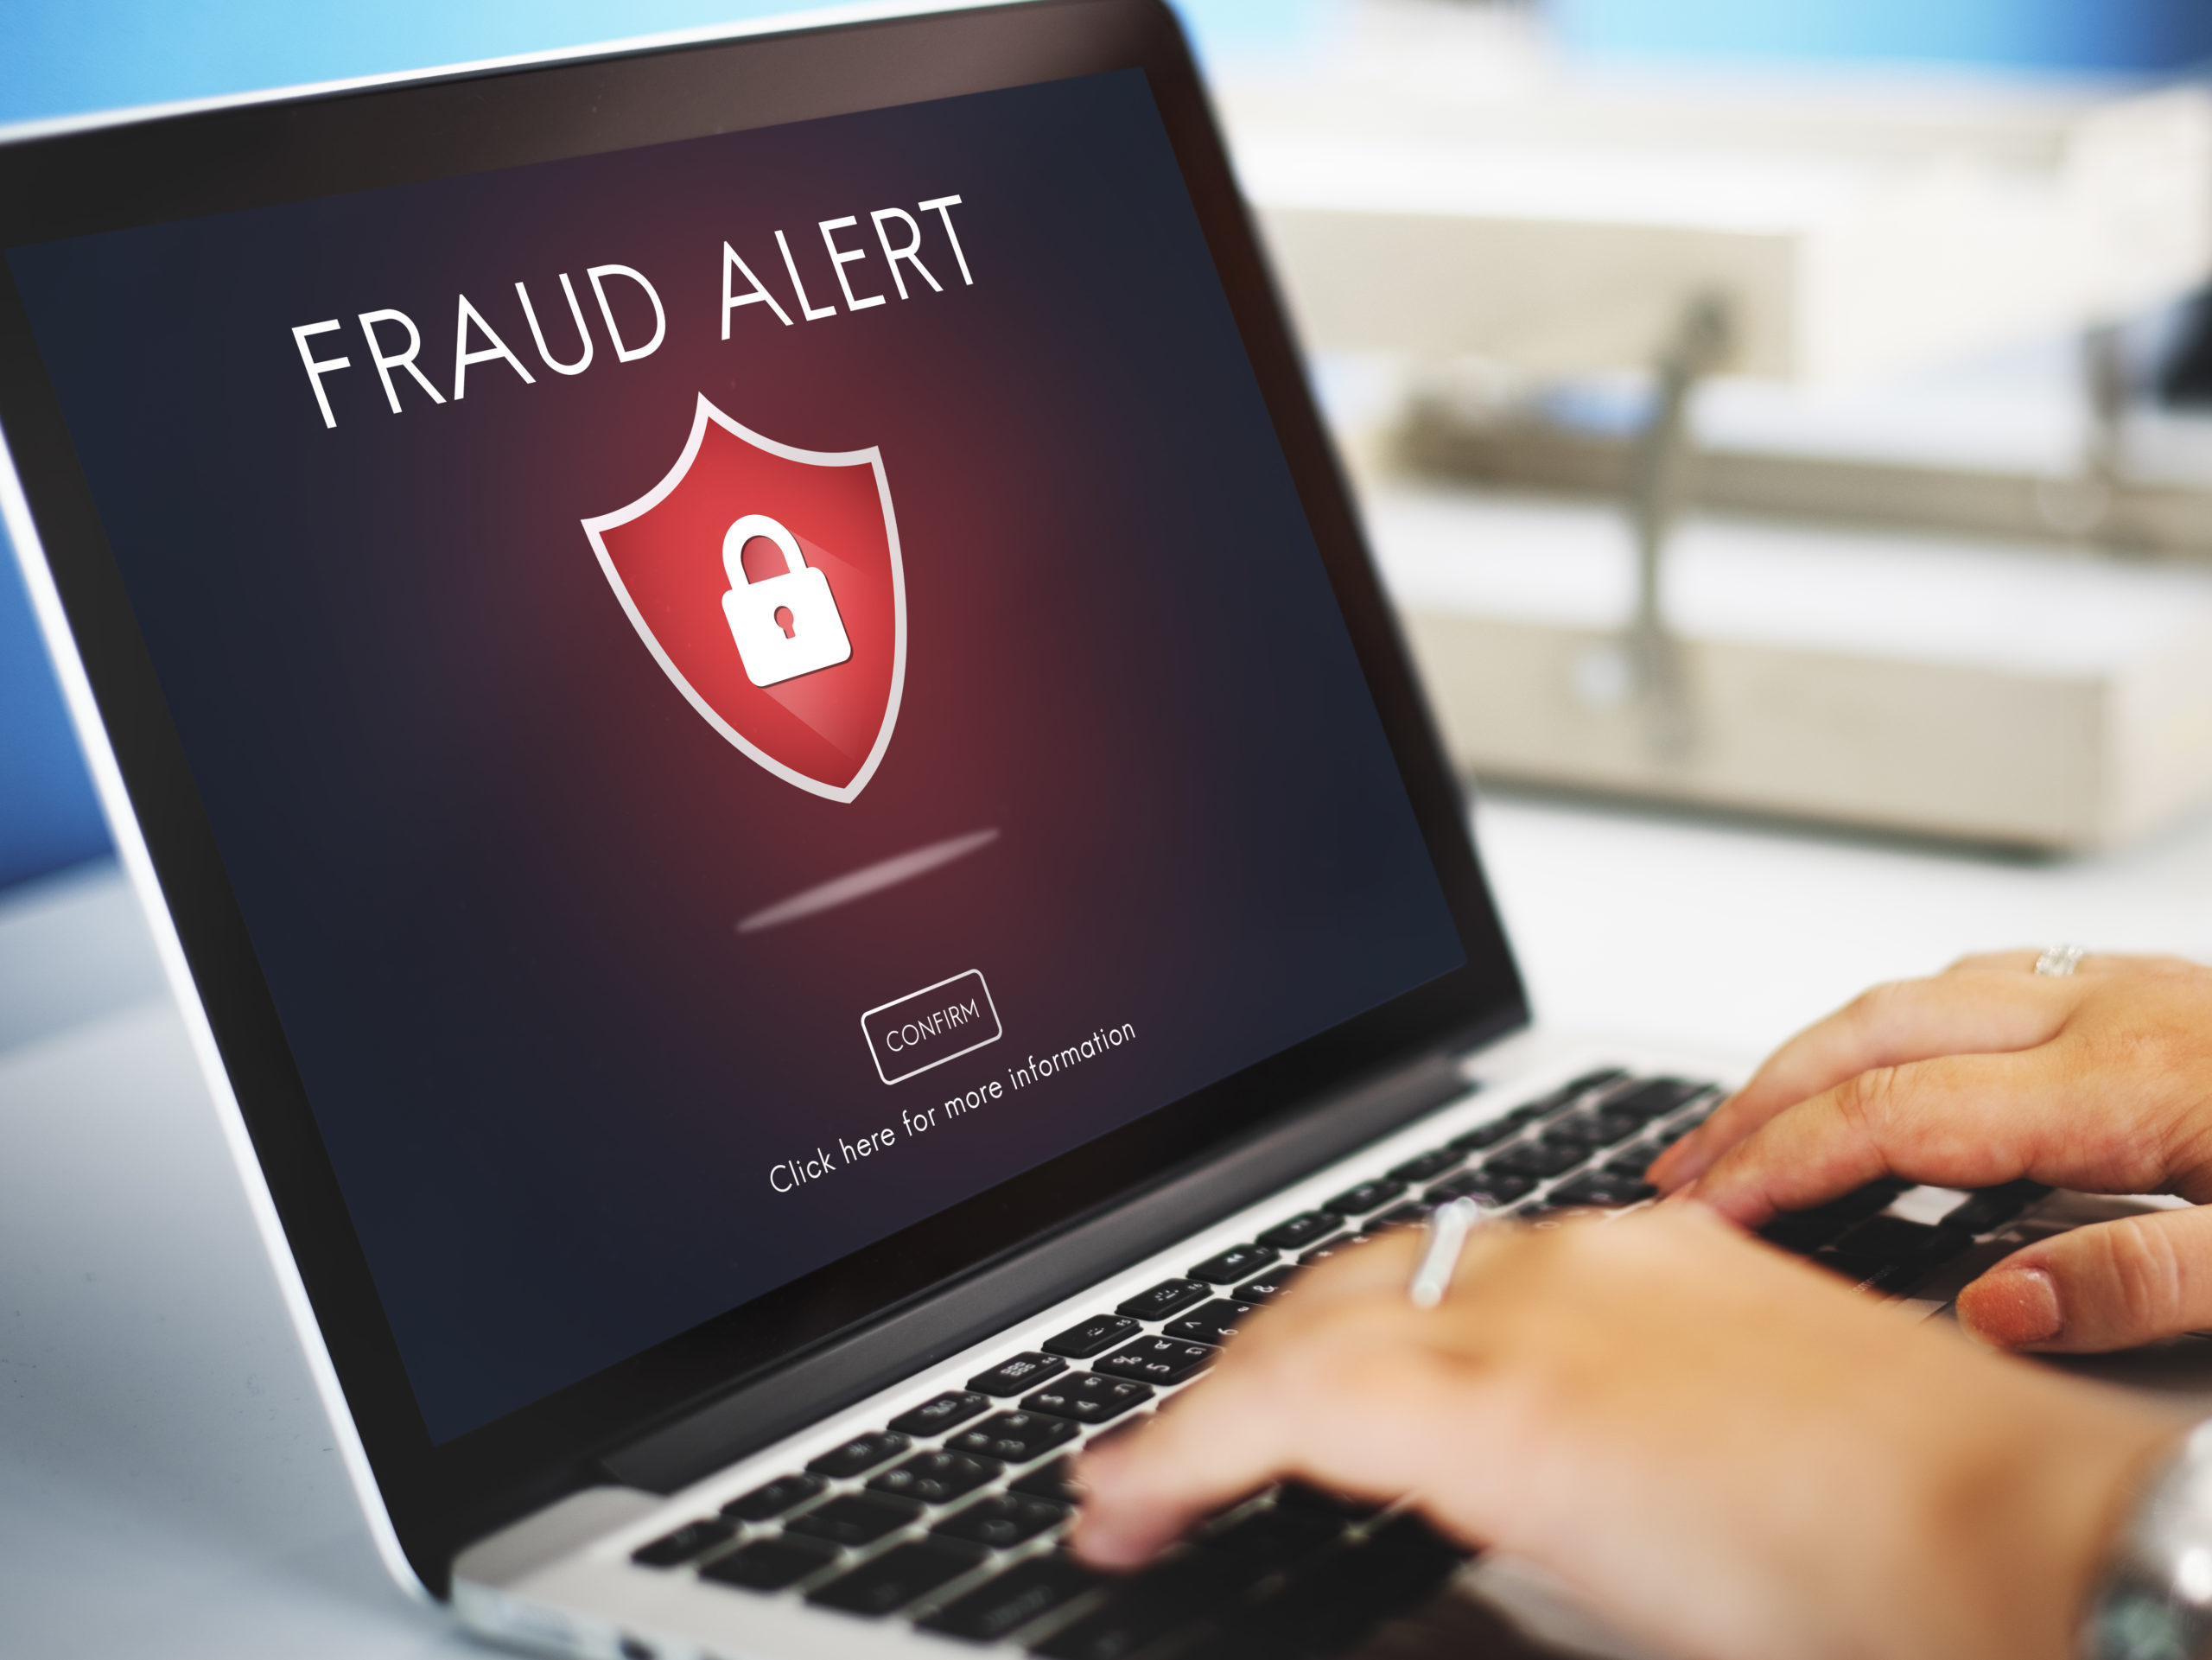

**Objetivo**

El objetivo del proyecto hacer un análisis exploratorio de las operaciones realizadas en el periodo de Septiembre del 2013, ver si existe una relacion de datos cuando se ejecutan fraudes con el fin de construir un modelo predictivo que sea capaz de predecir cuando se ejecutará una operación fraudulenta, para tomar las acciones pertinentes.

**Equipo de investigación**


*   Jorge Pons
*   Federico Florentin
*   Lautaro Fasciglioni



**Validación del proyecto**

*   
Leyton Jean Piere Castro Clavijo




**Fuenta de datos**

El data set que usaremos para este proyecto esta en la ruta : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

# **1- Importación de librerias y carga de datos**

Importamos las librerias que vamos a utilizar en el dataset

In [1]:
import numpy as np #Numerical Python
import pandas as pd #Procesamiento de datos
import matplotlib.pyplot as plt #Visualización de datos 
import seaborn as sns #Visualización de datos 
import matplotlib #Visualización de datos 


plt.rcParams['axes.facecolor'] = "#f5f5dc"
plt.rcParams['figure.facecolor'] ='#ffffbf'
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.size'] = 12
colors_list = ["#1034A6","#f5d400"]

Para la reducción de tiempos de espera mientras que hacemos pruebas reduccimos el número de filas del dataset (si quieres trabajar con el dataset al completo tienes que poner este valor : nrows=None)

In [2]:
#@title 
%%html
<p>nrows=<span style="color: #ed1b24">None</span>


In [3]:
nrows=None

Carga del dataset 

In [4]:
df=pd.read_csv("/content/creditcard.csv",nrows=nrows)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **2- Exploratory Data Analysis**

Uno de los primeros pasos que tenemos que hacer es entender el dataset que vamos a analizar, para ello nos ayudamos de un **E.D.A**. Este procedimiento nos proporcionará de una vista panoramica de los datos del data set y de que forma estan compuestos.

Descripción estadística de los datos numéricos

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Tipos de datos de las columnas

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Cantidad Total de filas en cada columna

In [8]:
df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

Cantidad total de valores nulos

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Eliminación dupliciados

In [10]:
df = df.drop_duplicates()
df.count()

Time      283726
V1        283726
V2        283726
V3        283726
V4        283726
V5        283726
V6        283726
V7        283726
V8        283726
V9        283726
V10       283726
V11       283726
V12       283726
V13       283726
V14       283726
V15       283726
V16       283726
V17       283726
V18       283726
V19       283726
V20       283726
V21       283726
V22       283726
V23       283726
V24       283726
V25       283726
V26       283726
V27       283726
V28       283726
Amount    283726
Class     283726
dtype: int64

**Observación:** 

Hasta aquí podemos ver que el data set escogido no tiene valores en cero, lo cual es bueno. Si tiene algunos valores duplicados que procedemos a eliminar para una muestra más limpia.

Text(-0.9, 1.08, 'Muestra la distribución de las clase')

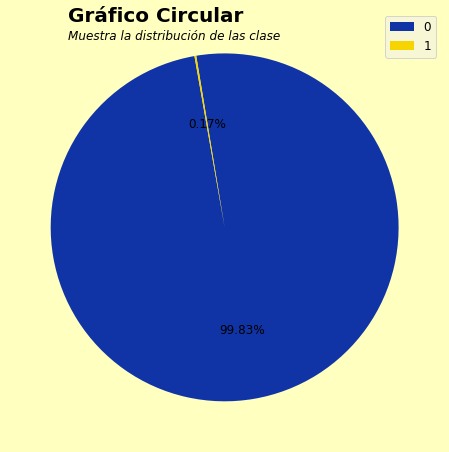

In [11]:
plt.pie(df["Class"].value_counts(),autopct='%1.2f%%',startangle=100,colors=colors_list)
plt.legend(labels=['0','1'])

plt.text(-0.9,1.18,"Gráfico Circular",fontsize=20,weight=600)
plt.text(-0.9,1.08,"Muestra la distribución de las clase",style="italic")

**Obvervación**: 

Estamos explorando la capa principal del data set, el formato de las variables en el mismo y una estadística descriptiva de cada una. Podemos observar que tenemos una cantidad pequeña de transacciones fraudulentas en esta muestra de datos. Esto nos da la pauta de que este conjunto de datos se encuentra bastante desbalanceado.

In [12]:
coste_total=pd.DataFrame({"Cantidad_transacciones_no_fraudulentas":df[df["Class"]==0]["Amount"].sum().ravel(),"Cantidad_transacciones_fraudulentas":df[df["Class"]==1]["Amount"].sum().ravel()})

In [13]:
coste_total

,Cantidad_transacciones_no_fraudulentas,Cantidad_transacciones_fraudulentas
0,25043410.29,58591.39


Vemos el peso en dinero que tienen las operaciones fraudulentas VS no fraudulentas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


Text(-0.9, 1.08, 'Muestra la distribución del coste total de las clase')

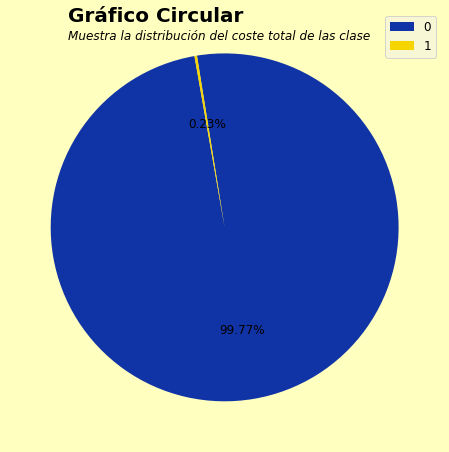

In [14]:
plt.pie(coste_total,autopct='%1.2f%%',startangle=100,colors=colors_list)
plt.legend(labels=['0','1'])
plt.text(-0.9,1.18,"Gráfico Circular",fontsize=20,weight=600)
plt.text(-0.9,1.08,"Muestra la distribución del coste total de las clase",style="italic")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


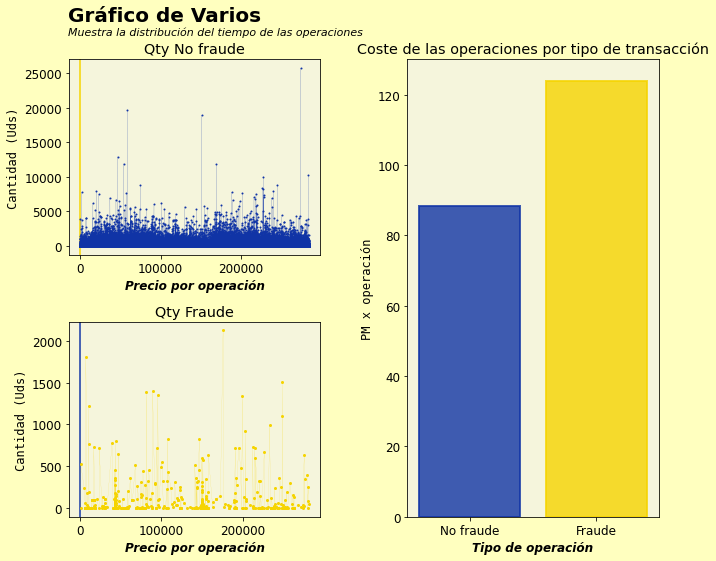

In [15]:
fig=plt.figure(constrained_layout=True)
gspec=fig.add_gridspec(ncols=4,nrows=4)

ax0=fig.add_subplot(gspec[:,2:])
ax0.set_title("Coste de las operaciones por tipo de transacción")
ax0.set_xlabel('Tipo de operación', size=12, fontstyle='italic', weight=900)
ax0.set_ylabel('PM x operación', size=12, family='monospace')
ax0=plt.bar(df.Class.unique().flatten().tolist(), height = [df[df["Class"]==0]["Amount"].mean(),df[df["Class"]==1]["Amount"].mean()],color=colors_list,alpha=0.8,edgecolor=colors_list,linewidth=2)
ax0=plt.xticks(np.arange(2),['No fraude', 'Fraude'])


ax1=fig.add_subplot(gspec[0:2,0:2])
ax1.text(-15000,32500,"Gráfico de Varios",fontsize=20,weight=600)
ax1.text(-15000,30500,"Muestra la distribución del tiempo de las operaciones",fontsize=11,style="italic")
ax1.set_title("Qty No fraude")
ax1.set_xlabel('Precio por operación', size=12, fontstyle='italic', weight=900)
ax1.set_ylabel('Cantidad (Uds)', size=12, family='monospace')
ax1.axvline([df[df["Class"]==1]["Amount"].mean()],color="#f5d400")
ax1=plt.plot(df[df["Class"]==0]["Amount"],markerfacecolor="#1034A6",marker='o',linewidth=0.1,color="#1034A6",markersize=1)

ax2=fig.add_subplot(gspec[2:4,0:2])
ax2.set_title("Qty Fraude")
ax2.set_xlabel('Precio por operación', size=12, fontstyle='italic', weight=900)
ax2.set_ylabel('Cantidad (Uds)', size=12, family='monospace')
ax2.axvline([df[df["Class"]==0]["Amount"].mean()],color="#1034A6")
ax2=plt.plot(df[df["Class"]==1]["Amount"],color="#f5d400",marker='o',markerfacecolor='#f5d400',linewidth=0.1,markersize=2)

plt.tight_layout()

plt.show()

**nota:** Apreciamos que el coste de las operaciones fraudulentas es superior en media a las operaciones no fraudulentas


**2.1- Analisis Univariado**


La Estadística Univariada incluye todas las técnicas que hacen referencia a la descripción e inferencia de una sola variable.
Vamos a analizar la columna "Time", y nuestro objetivo es presentar de manera clara el tiempo transcurrido desde la primera transacción en adelante de nuestras operaciones, para ver en que grupos de tiempo se concentran las operaciones. 
Para ello vamos a realizar 3 Gráficas diferentes.


1.   Caja: Vamos a ver la distribución de los tiempos y localiazar, si existiesen, los outliers.
2.   Violin: Vamos a ver la concentración de las operaciones.

1.   Histograma: Nos permite mostrar cómo se distribuyen los datos.








In [16]:
#Creamos una función con la intención de poder usar este mismo código si el día de mañana necesitamos analizar otra variable del mismo dataset
def univariable(data,columna):
  print("Interpretamos: ")
  print("Podemos ver que el tiempo medio de las operaciones es: ",round(data[columna].mean(),2))
  print("Podemos ver que el tiempo mínimo de las operaciones es: ",round(data[columna].min(),2))
  print("Podemos ver que el tiempo máximo de las operaciones es: ",round(data[columna].max(),2))
  print("Podemos ver que la cantidad total de transacciones es: ",round(data[columna].count(),0))
  
  fig=plt.figure(constrained_layout=True)
  gspec=fig.add_gridspec(ncols=4,nrows=4)

  ax0=fig.add_subplot(gspec[:2,2:])
  ax0.set_title("Distribución de tiempo")
  ax0=sns.boxplot(data=data[columna],color="#1034A6")
  ax0.set_xlabel('Distribución', size=12, fontstyle='italic', weight=900)
  ax0.set_ylabel('Tiempo (en Seg.)', size=12, family='monospace')
  

  ax1=fig.add_subplot(gspec[:2,:2])
  ax1.set_title("Distribución de tiempo")
  ax1=sns.violinplot(y=data[columna], orient='v',color="#f5d400")
  ax1.set_xlabel('Distribución', size=12, fontstyle='italic', weight=900)
  ax1.set_ylabel('Tiempo (en Seg.)', size=12, family='monospace')
  ax1.text(-0.5,229500,"Gráfico de Varios",fontsize=20,weight=600)
  ax1.text(-0.5,216000,"Muestra la distribución del tiempo de las operaciones",fontsize=11,style="italic")

  ax2=fig.add_subplot(gspec[2:,:])
  ax2.set_title("Distribución de tiempo")
  ax2=sns.histplot(data= data, x=columna, kde=True,color="#1034A6")
  ax2.set_xlabel('Tiempo (en Seg.)', size=12, fontstyle='italic', weight=900)
  ax2.set_ylabel('Cantidad', size=12, family='monospace')
  plt.show()
 

Interpretamos: 
Podemos ver que el tiempo medio de las operaciones es:  94811.08
Podemos ver que el tiempo mínimo de las operaciones es:  0.0
Podemos ver que el tiempo máximo de las operaciones es:  172792.0
Podemos ver que la cantidad total de transacciones es:  283726


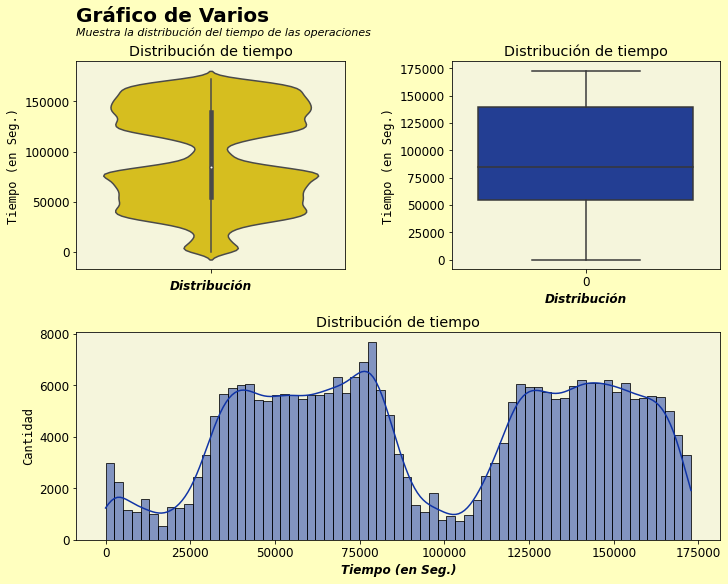

In [17]:
univariable(df,"Time")

**¿Qué podemos detectar en este punto?**

Podemos observar que tenemos una mayor concentración de operaciones cercanas al comienzo de la muestra que va disminuyendo a medida que se aleja del mínimo, llegando a apreciarse una especie de meseta entre los 4.000 y los 10.000 donde luego de este punto existe un pico de operaciones para luego mantenerse cercano al intervalo anterior.

**2.2- Analisis Bivariado**

La Estadística bivariada incluye todas las técnicas que hacen referencia a la descripción e inferencia de dos variables. 

La intención es ver que relación y distribución tienen dos variables. En este caso vamos a analizar las variables "Time" y "Class", y detectar, o no, relación. Vamos a utilizar los siguientes gráficos:




1.   Boxplot: Queremos saber la distrubución del tiempo VS la clase de transacción.
2.   Boxplot: Queremos saber la relación entre la cantidad de operaciones y la clase, ademas nos quedaremos unicamente con los datos sin outliers y analizaremos su desviación estandar.
2.   Violinplot: Queremos saber la distrubución del tiempo VS la clase de transacción y la cantidad dentro de esos valores.






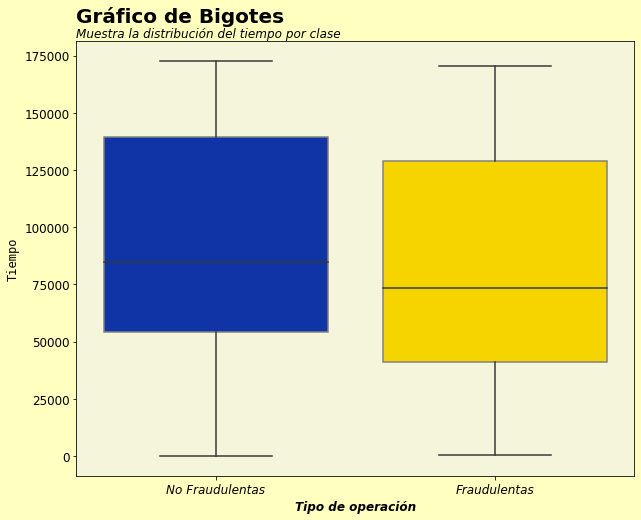

In [18]:
#Gráfico de cajas y bigotes tomando la variable tiempo y la clase, 
#donde podemos ver la relación entre el tiempo y el tipo de transacción. Aquí podemos ver que las transacciones fraudulentas tienen una aparicion 
#temprano en la toma de datos que las no fraudulentas.


# Nombre para las etiquetas del eje X
labels=["No Fraudulentas","Fraudulentas"]

# Creación del gráfico tipo boxplot
ax=sns.boxplot(data=df,x=df.Class,y=df.Time,palette=colors_list)
mybox = ax.artists[0]
mybox.set_facecolor("#1034A6")
mybox.set_edgecolor("gray")
mybox = ax.artists[1]
mybox.set_facecolor("#f5d400")
mybox.set_edgecolor("gray")

# Cambio títulos ejes X e Y
plt.xlabel('Tipo de operación', size=12, fontstyle='italic', weight=900)
plt.ylabel('Tiempo', size=12, family='monospace')
# Cambio de valores de las etiquetas del eje X
ax.set_xticklabels(labels,size=12, fontstyle='italic', weight=90)
plt.text(-0.5,189500,"Gráfico de Bigotes",fontsize=20,weight=600)
plt.text(-0.5,183000,"Muestra la distribución del tiempo por clase",style="italic")
plt.show()

**nota** Apreciamos que las operaciones fraudulentas son transacciones mas rápidas que las no fraudulentas 

In [19]:
["#1034A6","#f5d400"]

['#1034A6', '#f5d400']

Ahora vamos a analizar las variables "Class" y "Amount" (Amount = Monto de operación), para entender si existe relación entre estas dos:

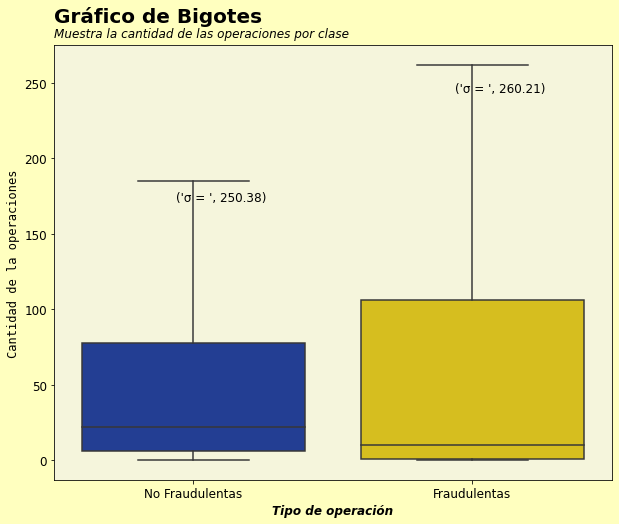

In [20]:

#variables para cambiar nombre de los titulos del eje X
labels=["No Fraudulentas","Fraudulentas"] 
#Creación del boxplot(para una mejor interpretación hemos quitado los outliers)
ax=sns.boxplot(data=df,x=df.Class,y=df.Amount,showfliers=False,palette=colors_list)
#título eje x
plt.xlabel('Tipo de operación', size=12, fontstyle='italic', weight=900) 
#titulo eje y
plt.ylabel('Cantidad de la operaciones', size=12, family='monospace')
#Anotacion std variable columna fraude "si"
plt.text(0.8, 0.9, ('σ = ', round(df[df.Class == 1].Amount.std(),2)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)
#Anotacion std variable columna fraude "No"
plt.text(0.3, 0.65, ('σ = ', round(df[df.Class == 0].Amount.std(),2)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

#cambio etiquetas eje x
ax.set_xticklabels(labels,fontweight=300)
plt.text(-0.5,290,"Gráfico de Bigotes",fontsize=20,weight=600)
plt.text(-0.5,280,"Muestra la cantidad de las operaciones por clase",style="italic")
plt.show()

**Nota**: Se observa que las operaciones fraudulentas de esta muestra tienen una desviación estandar cercana al doble que las no fraudulentas. Esto nos quiere decir que tenemos una mayor dispersión de los datos de operaciones fraudulentas, y que además, se alejan más de la media con respecto al monto.

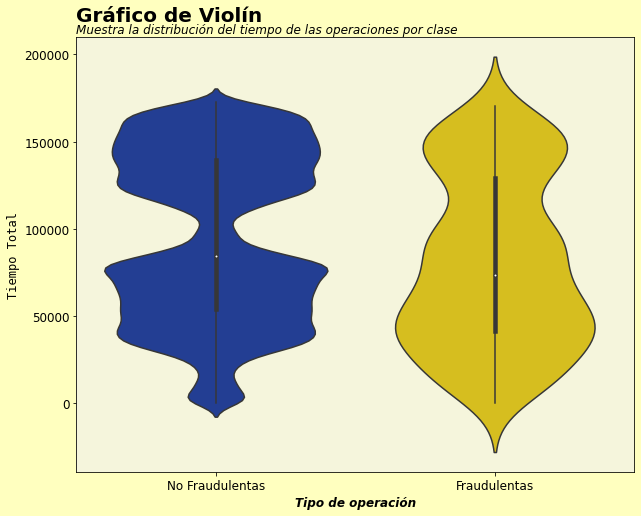

In [21]:
#creamos grafico de violin para ver al distribucion del tiempo en cada clase.

#variables para cambiar nombre de los titulos del eje X
labels=["No Fraudulentas","Fraudulentas"]
#Creación de la Gráfica violinplot 
ax=sns.violinplot(x=df.Class,y=df.Time,data=df ,size=8,palette=colors_list)
ax.set_xticklabels(labels,fontweight=300)
# Cambio títulos ejes X e Y
plt.xlabel('Tipo de operación', size=12, fontstyle='italic', weight=900)
plt.ylabel('Tiempo Total', size=12, family='monospace')
plt.text(-0.5,219000,"Gráfico de Violín",fontsize=20,weight=600)
plt.text(-0.5,212000,"Muestra la distribución del tiempo de las operaciones por clase",style="italic")

plt.show()


**¿Qué podemos detectar en este punto?**

Podemos observar que las operaciones fraudulentas tienen una desviación estandar de casi el doble de las no fraudulentas, por ende, una mayor distribución de los datos en la muestra respecto de la media. 

Además de que las operaciones fraudulentas ocurren, en su mayoría, cercanas al centro de la muestra. Contrariamente de las no fraudulentas, que en el mismo intervalo, tienen una menor ocurrencia. 

**2.3- Análisis Multivariante**

La estadística multivariante o multivariada es una rama de las estadísticas que abarca la observación y el análisis simultáneos de más de una variable respuesta. 

Pasos seguidos:


1.   Analizar la correlación entre las variables, para poder reducir el archivo en algún momento quedándonos solo con lo que de verdad nos ayudará a predecir la clase, o sea si es fraudulenta o no. 
Graficos utilizados:

  *   Barplot:  El objetivo de este gráfico es ver de manera visual y rápida qué variables tienen una alta correlación positiva o negativa. 
  *   Heatmap:  El objetivo es visualizar qué correlación tienen entre si todas las columnnas de nuestro dataset.


2.   Una vez filtrados nuestros datos, realizaremos una serie de gráficos que nos ayuden a ver si estamos haciendo una buena selección de estos filtros y si estos nos ayudarán a predecir las clases.

    *   Scatterplot:  Queremos obtener de manera visual la relacción entre la cantidad de las operaciones, y las columnas que más correlación tienen con la clase, el resultado aparentemente nos permite ver que si están distinguidas en cierto modo.
    
    *   Regplot:  Queremos obtener el comportamiento de tipos de operaciones con las columnas que tienen más correlación con la clase, analizaremos la cantidad y veremos el comportamiento. Al ser un archivo muy grande hemos quitado el intervalo de confianza ya que eso hace muy pesado el dataset, pero si lo activamos podemos ver el comportamiento de cada variable a la hora de predecir la clase.
    *   Histplot:  Queremos obtener el comportamiento de los tipos de operaciones con el tiempo que separa la transacción de las demás.
    *   Pairplot:  El objetivo es ver la clasificación de las clases en las columnas con mayor correlacion positiva y negativa, esto hace que visualmente podamos ver la separación entre las clases.



In [22]:
#Creación de la variable con la correlacion de la clase frente a las columnas y las colocamos por orden
correlacion_con_columna_class=df.corr()["Class"].drop(index="Class").sort_values(ascending=False)

In [23]:
colors_list

['#1034A6', '#f5d400']

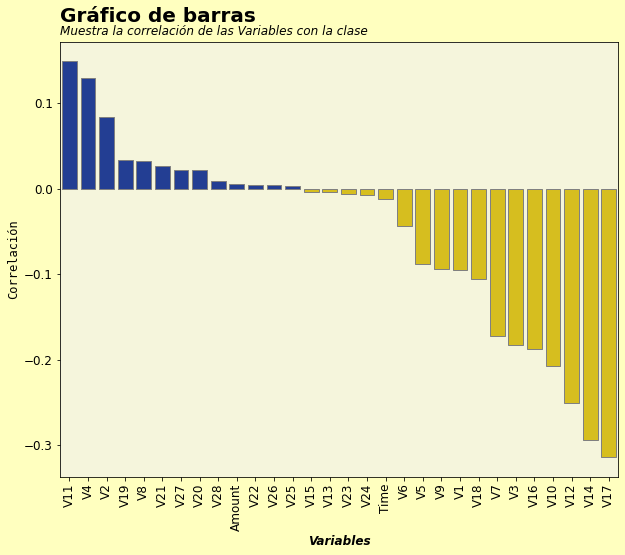

In [24]:
# Creamos los colores para el Gráfico
colors = ['#1034A6' if c >= 0 else '#f5d400' for c in correlacion_con_columna_class.values]
plt.text(-0.5,0.195,"Gráfico de barras",fontsize=20,weight=600)
plt.text(-0.5,0.18,"Muestra la correlación de las Variables con la clase",style="italic")
#Creación de barplot 
sns.barplot(x = correlacion_con_columna_class.index,
            y = correlacion_con_columna_class.values,palette=colors,edgecolor = 'gray')
#Etiquetas eje X con rotación
plt.xticks(rotation = 90)
plt.xlabel('Variables', size=12, fontstyle='italic', weight=900)
plt.ylabel('Correlación', size=12, family='monospace')

plt.show()

**Nota** En este punto, estamos visualizando la correlación positiva y negativa de cada variable contra la clase. Observamos que donde mayor correlación positiva existe es en las variables resultantes del PCA existente en el data set, y que, distinto a lo que pensabamos, el tiempo tiene una correlación pequeña.

In [25]:
colors_list

['#1034A6', '#f5d400']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


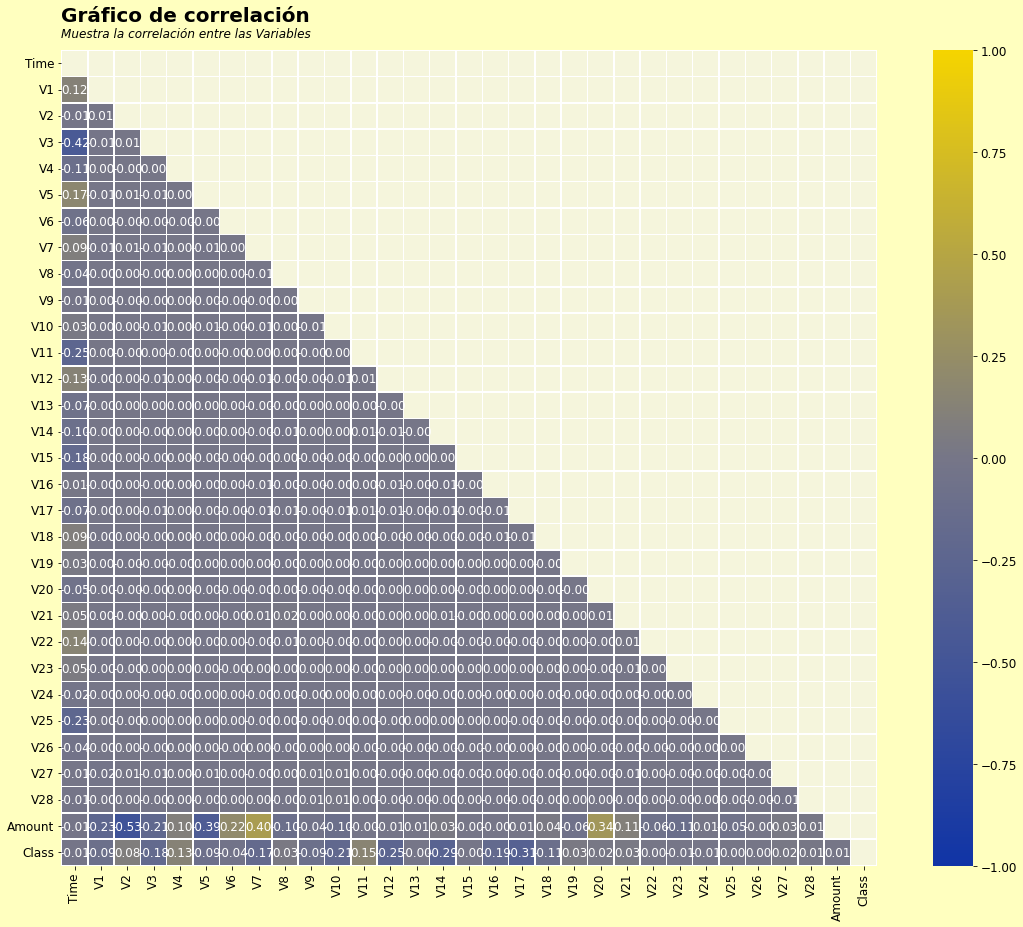

In [26]:
#Creamos mapa de calor para ver la correlación, se pone en forma de triangulo para faciliar la comprensión

#creacion los colores del Gráfico de correlación 
colors = [ '#1034A6','#1034A6','#1034A6', '#f5d400', '#f5d400', '#f5d400']
#767688
colors = [ '#1034A6', '#767688', '#f5d400']
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
# Tamaño de las figura
plt.rcParams["figure.figsize"]=(20,15)
# Creamos una matriz vacia, para que sea mas facil ver la correlación
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
# Creación del mapa de calor
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,linewidth=0.5,square=True,fmt='.2f',mask=mask,cmap=cmap)
plt.text(0,-1.1,"Gráfico de correlación",fontsize=20,weight=600)
plt.text(0,-0.5,"Muestra la correlación entre las Variables",style="italic")
plt.show()
plt.rcParams["figure.figsize"] = (10,8)

**Nota** Apreciamos que hay muy poca correlacción entre los datos 

In [27]:
# Creacion de dataframe con las columnas con mayor correlación tanto positiva como negativa
filtrado_correlacion_positiva=df[["V11","V4","V2","V19","Class"]]
filtrado_correlacion_negativa=df[["V17","V14","V3","V12","Class"]]

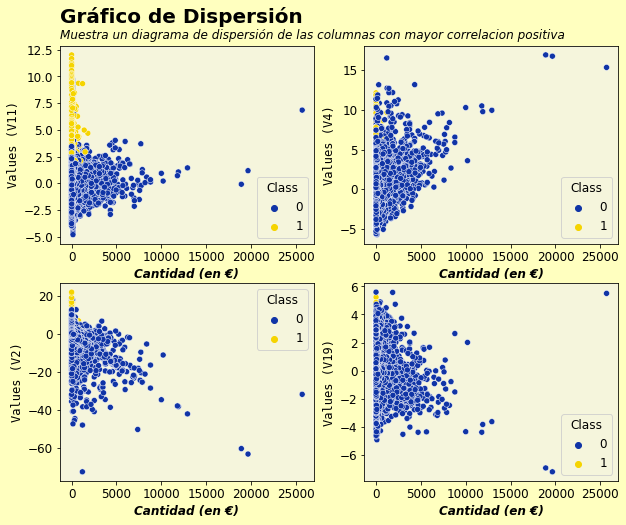

In [28]:

# Creación de una serie de graficos donde vemos la relación de la cantidad de las operaciones frente a las columnas anteriormente seleccionadas por clase
f, ax = plt.subplots(2,2)
ax1=sns.scatterplot(data = df, x ='Amount', y = filtrado_correlacion_positiva.iloc[:,0], hue = 'Class',  ax=ax[0,0],palette=colors_list)
# ax1.set(xlabel='common xlabel', ylabel='common ylabel')
ax1.set_xlabel("Cantidad (en €)",size=12, fontstyle='italic', weight=600)
ax1.set_ylabel("Values (V11)",size=12, family='monospace')
ax1.text(-1250,15,"Gráfico de Dispersión",fontsize=20,weight=600)
ax1.text(-1250,13.5,"Muestra un diagrama de dispersión de las columnas con mayor correlacion positiva",style="italic")

ax2=sns.scatterplot(data = df, x ='Amount', y = filtrado_correlacion_positiva.iloc[:,1], hue =  'Class', ax=ax[0,1],palette=colors_list)
ax2.set_xlabel("Cantidad (en €)", size=12, fontstyle='italic', weight=600)
ax2.set_ylabel("Values (V4)",size=12, family='monospace')


ax3=sns.scatterplot(data = df, x ='Amount', y = filtrado_correlacion_positiva.iloc[:,2], hue = 'Class',  ax=ax[1,0],palette=colors_list)
ax3.set_xlabel("Cantidad (en €)",size=12, fontstyle='italic', weight=600)
ax3.set_ylabel("Values (V2)",size=12, family='monospace')

ax4=sns.scatterplot(data = df, x ='Amount', y = filtrado_correlacion_positiva.iloc[:,3], hue = 'Class',  ax=ax[1,1],palette=colors_list)
ax4.set_xlabel("Cantidad (en €)",size=12, fontstyle='italic', weight=600)
ax4.set_ylabel("Values (V19)",size=12, family='monospace')



# plt.tight_layout()
plt.show()


**Nota** Como podemos apreciar el programa puede diferenciar con bastante facilidad las operaciones fraudulentas , ya que tienen un comportamiento muy similar en cada una de las columnas con mayor coorelación positiva

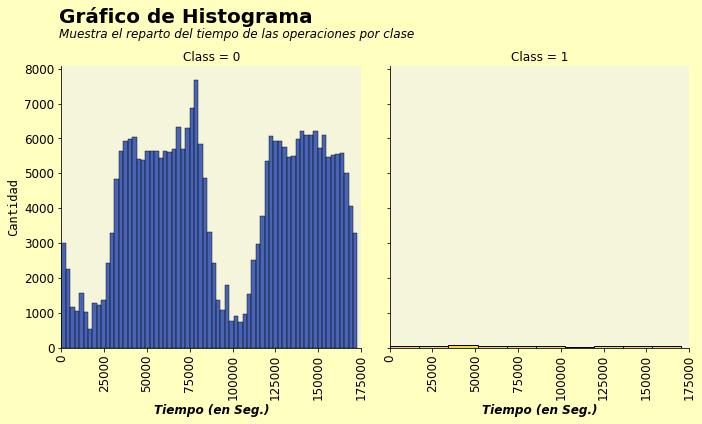

In [29]:
# Creación gráfico histplot para ver la relación del tiempo de la operacion con la cantidad por tipo de transacción 

g = sns.FacetGrid(df, height=5,col="Class",hue="Class",palette=colors_list)
g.fig.text(0.09,1.04,"Gráfico de Histograma",fontsize=20,weight=600)
g.fig.text(0.09,1,"Muestra el reparto del tiempo de las operaciones por clase",style="italic")
g.map_dataframe(sns.histplot, x="Time")
g.axes[0,0].set_xlabel('Tiempo (en Seg.)',size=12, fontstyle='italic', weight=600)
g.axes[0,1].set_xlabel("Tiempo (en Seg.)",size=12, fontstyle='italic', weight=600)
g.axes[0,0].set_ylabel('Cantidad',size=12, family='monospace')
g.set_xticklabels(rotation=90)
g.axes[0,0].set_ylim(0,)
g.axes[0,0].set_xlim(0,175000)
plt.show()

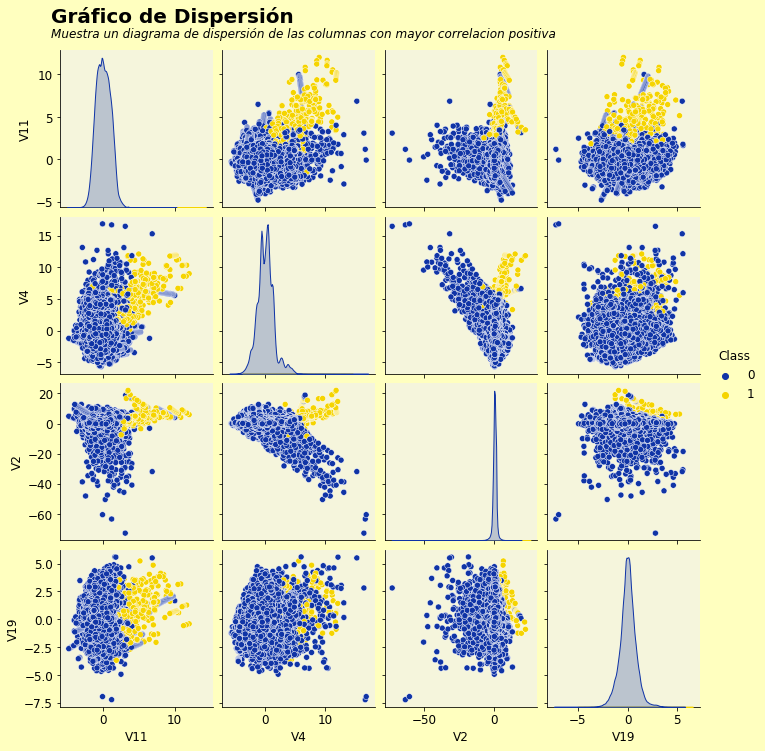

In [30]:
# Creacion de los graficos de correlacion por columna con el objetivo de distiguir la clase.
# sns.set(rc = {'figure.figsize':(15,8)})
a=sns.pairplot(filtrado_correlacion_positiva,hue="Class",palette=colors_list)
a.fig.text(0.075,1.02,"Gráfico de Dispersión",fontsize=20,weight=600)
a.fig.text(0.075,1,"Muestra un diagrama de dispersión de las columnas con mayor correlacion positiva",style="italic")
plt.show()

**Nota**: Teniendo en cuenta las columnas elegidas con correlación positiva, podemos observar que la clase se puede distinguir facilmente en varios casos, por ejemplo los V11 vs V4, V2 y V19. 

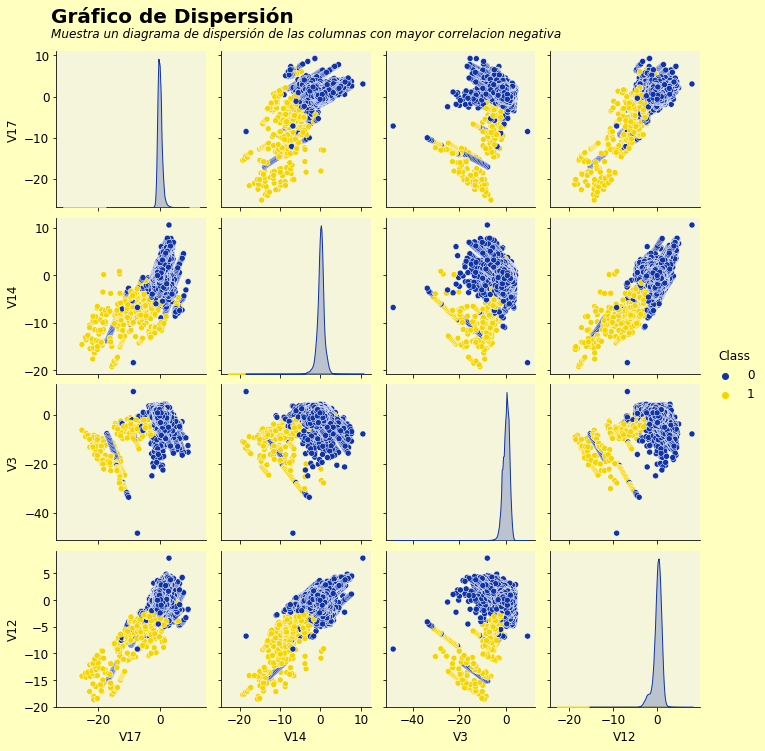

In [31]:
# Creacion de los graficos de correlacion por columna con el objetivo de distiguir la clase.

a=sns.pairplot(filtrado_correlacion_negativa,hue="Class",palette=colors_list)
a.fig.text(0.075,1.02,"Gráfico de Dispersión",fontsize=20,weight=600)
a.fig.text(0.075,1,"Muestra un diagrama de dispersión de las columnas con mayor correlacion negativa",style="italic")
plt.show()

En este caso, de correlación negativa, también es de facil apreciación la distinción entre las clases, pero a diferencia de la positiva, aquí se aprecia en todas.

# 3- Elección del Algoritmo

**3.1- DecisionTreeClassifier**

DecisionTreeClassifier: (Pang-Ning et al., 2006) crea el modelo de clasificación mediante la construcción de un árbol de decisión. Cada nodo en el árbol especifica una prueba en un atributo, cada rama que desciende de ese nodo corresponde a uno de los valores posibles para ese atributo.

Algunas ventajas de los árboles de decisión son:



*   Fácil de entender y de interpretar. Los árboles se pueden visualizar.
*   Requiere poca preparación de datos. Otras técnicas a menudo requieren la normalización de datos, es necesario crear variables ficticias y eliminar valores en blanco. Sin embargo, tenga en cuenta que este módulo no admite valores faltantes.


*   El costo de usar el árbol (es decir, predecir datos) es logarítmico en la cantidad de puntos de datos usados ​​para entrenar el árbol.
*   Capaz de manejar datos numéricos y categóricos. Sin embargo, la implementación de scikit-learn no admite variables categóricas por ahora. Otras técnicas suelen estar especializadas en analizar conjuntos de datos que tienen un solo tipo de variable. Ver algoritmos para más información.


*   Capaz de manejar problemas de múltiples salidas.
*   Posibilidad de validar un modelo mediante pruebas estadísticas. Eso permite dar cuenta de la fiabilidad del modelo.
















Esta es la visualización de un DecisionTreeClassifier:

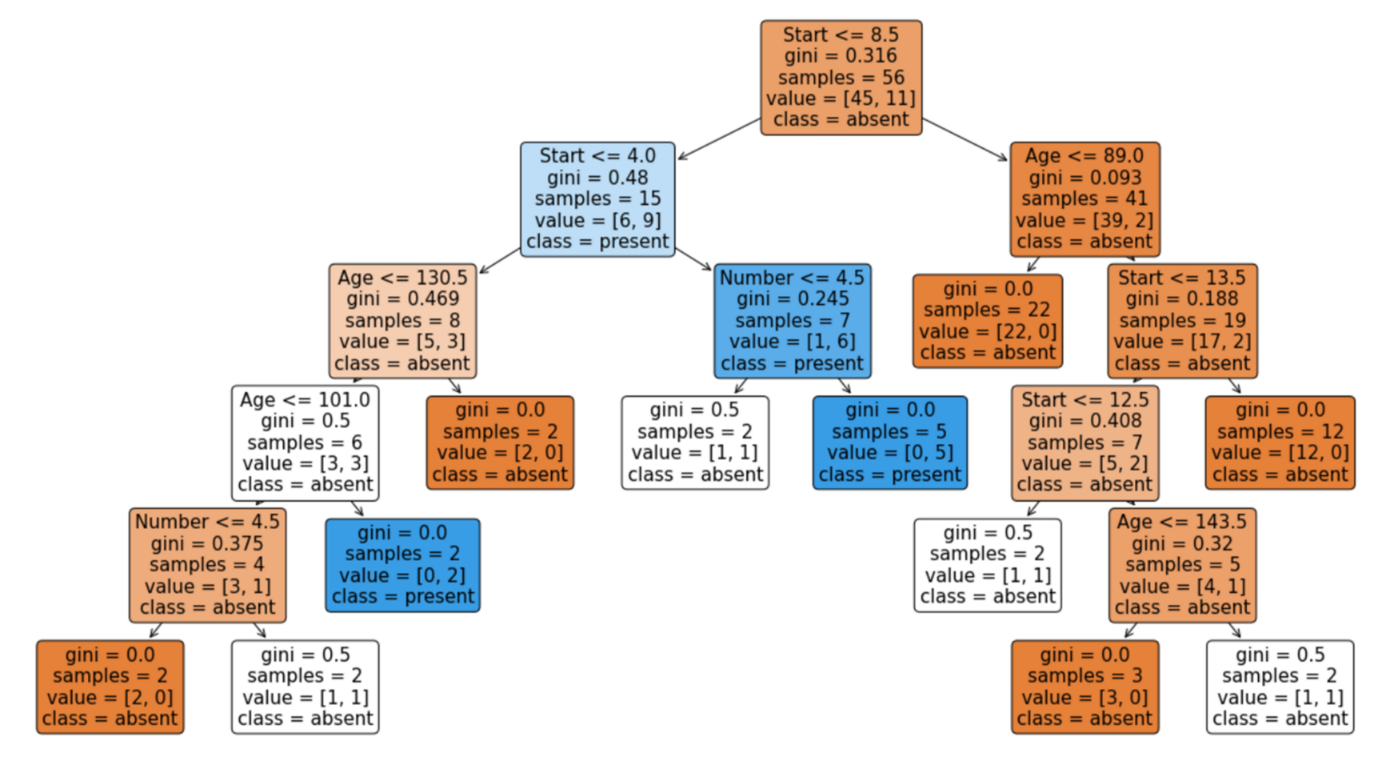

Pasos seguidos:

3.1.1 Importar librerias necesarias

Importamos las librerias que vamos a utilizar en el siguiente modelo de predicción

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree

3.1.2 Separación de variables y la clase

Copiamos el dataset principal, para asegurarnos que no modificamos nada en ese elemento y lo separamos en dos partes , "X" las variables del dataset e "y" la clase

In [33]:
classificacion=df.copy()
X=classificacion.drop("Class",axis=1)
y=classificacion.Class

3.1.3 Escalando variables

Como el dataset cuenta con dos columnas que son muy dispares del resto de columnas del dataset escalamos todos los datos de ese modo tendrán unos datos uniformes y será más fácil realizar la predicción. pasos realizados


1.   creacion de procesador de los datos.
2.   transformación de los datos solo en las variables a predeccir


In [34]:
sc=StandardScaler()	
X=sc.fit_transform(X)

3.1.4 Entrenamiento y validación

Separamos el dataset en un 70% de los datos para entrenamiento y el 30% para validación

In [35]:
x_train, x_test , y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

3.1.5 Entrenamiento del modelo.

Creamos un modelo con unos argumentos aleatorios para de ese modo despues merjorarlos. 

Pasos seguidos:


1.   Creación del modelo de entremaiento
2.   Entrenamiento del modelo en las variables de entrenamiento



In [36]:
clf=DecisionTreeClassifier(max_depth=2,random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

3.1.6 Visualizar la construción del modelo

Realizamos un gráfico para ver el comportamiento del modelo de entrenamiento.

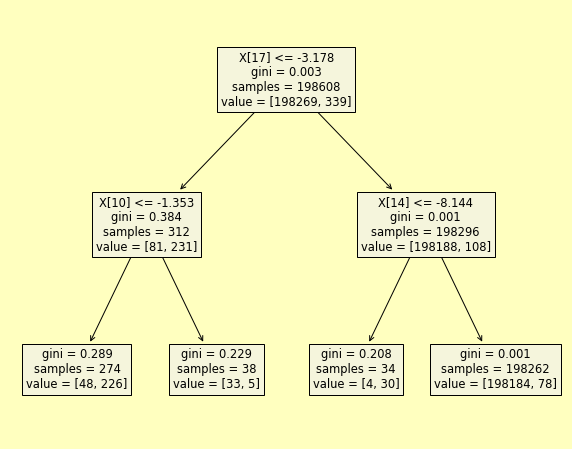

In [37]:
tree.plot_tree(clf)
plt.show()

3.1.7 Predicción del modelo

Realizamos la prediccion del modelo de entrenamiento y modelos de test de este modo en el siguiente paso podemos ver la precisión de nuestro modelo

In [38]:
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

3.1.8 Precisión del modelo

Vamos a conocer el resultado de la predicción del modelo pasos seguidos:


1.   Importamos libreria para la metrica de la predicción

1.   Creamos una variable con el resultado de la predicción de los datos de entrenamiento y otra con los datos de precisión

1.   Imprimimos el resultado.




In [39]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)
print(f"Accuracy train_accuracy: {train_accuracy*100.0:,.2f}%")
print(f"Accuracy test_accuracy: {test_accuracy*100.0:,.2f}%") 

Accuracy train_accuracy: 99.93%
Accuracy test_accuracy: 99.92%


**Nota:** Dada la alta precisión del modelo, vamos a ejecutar otras métricas de evaluación que se adapten mejor a nuestro conjunto de datos:

**Precision score** 

La métrica de precisión es utilizada para poder saber qué porcentaje de valores que se han clasificado como positivos son realmente positivos.

In [40]:
from sklearn.metrics import precision_score
train_precision=precision_score(y_train, y_train_pred)
test_precision=precision_score(y_test, y_test_pred)
print(f"Precision train_precision: {train_precision*100.0:,.2f}%")
print(f"Precision test_precision: {test_precision*100.0:,.2f}%") 

Precision train_precision: 83.12%
Precision test_precision: 81.25%


Podemos ver que en el test tenemos un alto % de valores que se clasificaron como positivos y si lo son.

**Recall score**

La métrica de recall, también conocida como el ratio de verdaderos positivos, es utilizada para saber cuantos valores positivos son correctamente clasificados.

In [41]:
from sklearn.metrics import recall_score
train_recall=recall_score(y_train, y_train_pred)
test_recall=recall_score(y_test, y_test_pred)
print(f"Recall score train_recall: {train_recall*100.0:,.2f}%")
print(f"Recall score test_recall: {test_recall*100.0:,.2f}%") 

Recall score train_recall: 75.52%
Recall score test_recall: 67.91%


**F1 score**

Esta es una métrica muy utilizada en problemas en los que el conjunto de datos a analizar está desbalanceado. Esta métrica combina el precision y el recall, para obtener un valor mucho más objetivo.

In [42]:
from sklearn.metrics import f1_score
train_f1_score=f1_score(y_train, y_train_pred)
test_f1_score=f1_score(y_test, y_test_pred)
print(f"F1 score train_f1_score: {train_f1_score*100.0:,.2f}%")
print(f"F1 score test_f1_score: {test_f1_score*100.0:,.2f}%") 

F1 score train_f1_score: 79.13%
F1 score test_f1_score: 73.98%


**nota:** Tenemos unos datos de precisión muy muy buenos, estos pueden ser por que el programa conozca muy bien la diferencia entre una operación fraudulenta o no. También puede ser derivado al tipo de datos que le hemos aportado ya que le hemos presentado unos datos donde hay una cantidad muy grande de operaciones no fraudulentas y muy pocas no fraudulentas, en ese caso se suele decir que el programa se aprendio el resultado algo que puede ser negativo.

Debido a la alta precisión del modelo, lo evaluamos teniendo en cuenta otras métricas, como el "Recall", "F1 score" y el "Precision". 

Para nuestro caso, podemos decir que la mejor métrica para nuestro modelo es el F1 score, dado que la naturaleza en la que se utiliza la misma es cuando los datos estan desbalanceados, y como tenemos muchas operaciones no fraudulentas en relación a las fraudulentas, nos quedamos con esta.


3.1.9 Selección del mejor modelo para nuestro entrenamiento.

Vamos a intentar mejorar los datos, para eso vamos a realizar los siguientes pasos.


1.  Creación de Lista vacia (max_depth,acc_gini,acc_entropy)
2.   Bucle for en un rango desde 1 hasta 30, donde por cada número creamos un modelo gini y entropy con un max_depth igual al número en el bucle.
2.   Agregamos en la lista creada anteriormente los resultados de la precisión en cada criterio (gini o entropy) y el max_depth correspondiente.
2.   Creamos un dataframe donde cada fila contara con el resultado de la precisión en gini, entropy y el max_depth.
2.  Creación de un grafica donde veremos claramente que configuración fue la mas acertada.

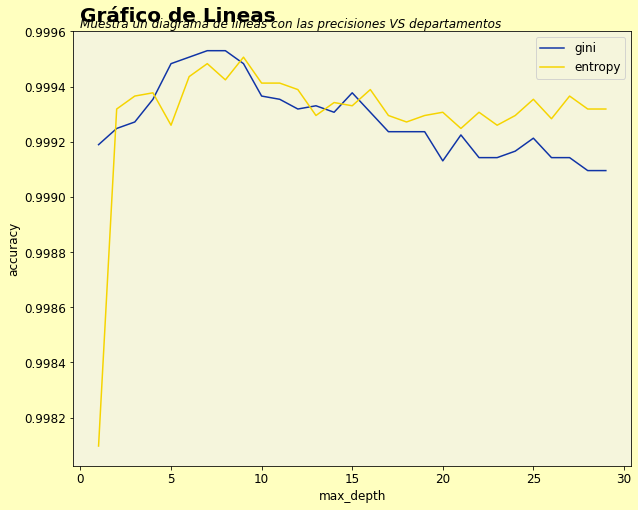

In [43]:

max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
  dtree = DecisionTreeClassifier(criterion='gini',max_depth=i )
  dtree.fit(x_train, y_train)
  pred = dtree.predict(x_test)
  acc_gini.append(accuracy_score(y_test, pred))
 
  dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
  dtree.fit(x_train, y_train)
  pred = dtree.predict(x_test)
  acc_entropy.append(accuracy_score(y_test, pred))
 
  max_depth.append(i)


d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})


plt.plot('max_depth','acc_gini', data=d, label='gini',color=colors_list[0])
plt.plot('max_depth','acc_entropy', data=d, label='entropy',color=colors_list[1])
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.text(-0.047,0.999635,"Gráfico de Lineas",fontsize=20,weight=600)
plt.text(-0.047,0.999615,"Muestra un diagrama de lineas con las precisiones VS departamentos ",style="italic")
plt.legend()
plt.show()


3.1.10 Creacción del mejor modelo de entrenamiento.

Creamos el modelo de entrenamiento con los mejores resultados que hemos obtenido en el anterior apartado

In [44]:
clf=DecisionTreeClassifier(criterion="gini", max_depth=5,random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

3.1.11 Predicción con el nuevo modelo.

 Realizamos la prediccion del modelo de entrenamiento y modelos de test de este modo en el siguiente paso podemos ver la precisión de nuestro nuevo modelo

In [45]:
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

3.1.12 Precisión del nuevo modelo.

Vamos a conocer el resultado de la predicción del modelo pasos seguidos:


1.   Importamos libreria para la metrica de la predicción
2.   Creamos una variable con el resultado de la predicción de los datos de entremaiento y otra con los datos de precisión
2.   imprimimos el resultado.


In [46]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)
print(f"Accuracy train_accuracy: {train_accuracy*100.0:,.2f}%")
print(f"Accuracy test_accuracy: {test_accuracy*100.0:,.2f}%") 

Accuracy train_accuracy: 99.96%
Accuracy test_accuracy: 99.95%


**Nota:**Como vemos la precisión del modelo es algo mejor que antes.

3.1.13 Visualización del nuevo modelo.



Realizamos un gráfico para ver el comportamiento del nuevo modelo de entremaiento.

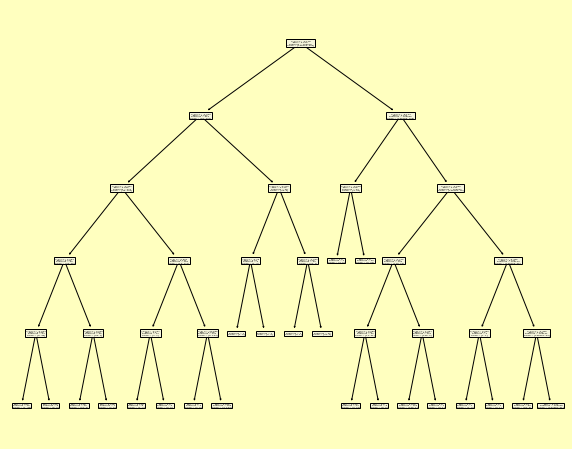

In [47]:
tree.plot_tree(clf)
plt.show()

3.1.14 Matriz de confusión.

Queremos ver el desempeño de entrenamiento. pasos seguidos:


1.   Importamos libreria
2.   Activamos la matriz de confision con los valores y_test y y_pred



In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[84972,    12],
       [   31,   103]])

3.1.15 Visualización de la Matriz de confusión.

Queremos mostrar visualmente el desempeño de entrenamiento. pasos seguidos:

Importamos libreria
Creamos el gráfico  para ello le tenemos que dar el estimador utilizado , y los valores 

In [49]:
cmap.reversed()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


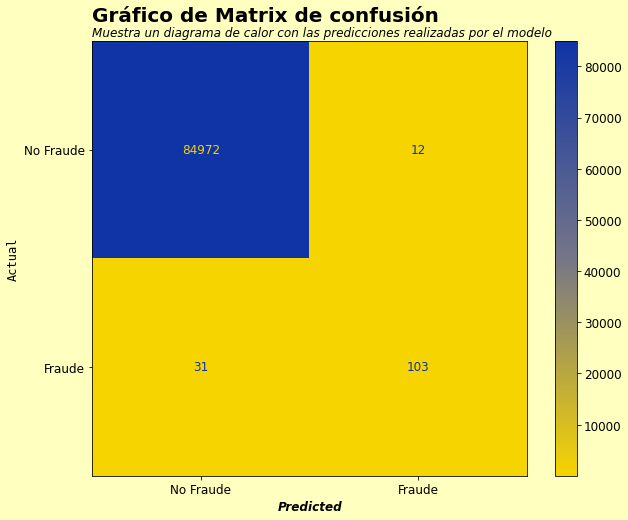

In [50]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots()
plot_confusion_matrix(clf, x_test, y_test,cmap=cmap.reversed(),ax=ax)
# ax.set(xlabel='Predicted', ylabel='Actual', title='Confusion Matrix Actual vs Predicted')
ax.xaxis.set_ticklabels(['No Fraude', 'Fraude']) 
ax.yaxis.set_ticklabels(['No Fraude', 'Fraude']) 
ax.set_xlabel('Predicted', size=12, fontstyle='italic', weight=600)
ax.set_ylabel('Actual',size=12, family='monospace')
ax.text(-0.5,-0.59,"Gráfico de Matrix de confusión",fontsize=20,weight=600)
ax.text(-0.5,-0.52,"Muestra un diagrama de calor con las predicciones realizadas por el modelo",style="italic")

plt.show()

**Observación**: 

Esta matriz nos esta mostrando que fueron pocas veces en las que el modelo clasifico una transaccion de forma erronea, pero vamos a comprobar estos resultados más adelante.

# 4-Comprobacíon de las medidas

Queremos comprobar si la predicción esta siendo correcta ya que tenemos datos muy desbalanceados, para ello vamos a comprobar la medición en el momento actual VS el dato balanceado.

4.1 Logistic Regression 

Pasos seguidos:

  4.1.1.   Importamos libreria.

  4.1.2.   Creamos el modelo.

  4.1.3.   Entrenamos el modelo con las variables y la clase de entrenamiento.

  4.1.4.   Vemos la puntuación del modelo.


  4.1.5.   Predecimos la clase en el set de test.

  4.1.6.   Elemento de lista







In [51]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=123,solver='newton-cg')
clf.fit(x_train,y_train)
clf.score(x_train,y_train)
pred=clf.predict(x_test)
print("Precisión de acierto del modelo: LogisticRegression", round(accuracy_score(y_test,pred)*100,5))


Precisión de acierto del modelo: LogisticRegression 99.91659


Validación:

4.1.7. Creamos una matriz de confusión.

4.1.8. Creamos el gráfico con los datos de la matriz de confusión.

4.1.9. Entrenamos el modelo con las variables y la clase de entrenamiento.

4.1.10. Creamos el reporte de clasificación.


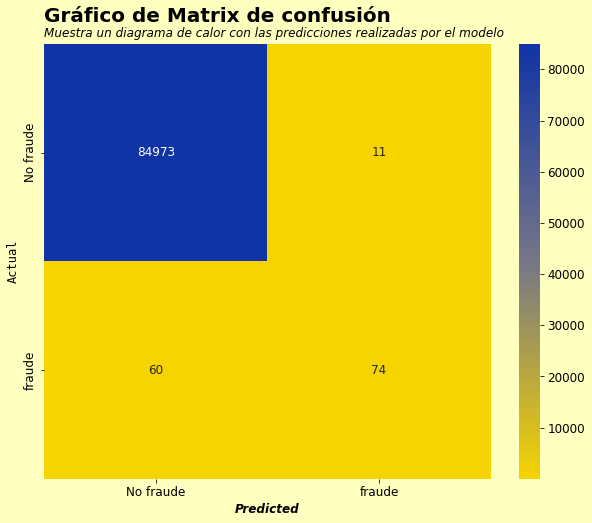

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.87      0.55      0.68       134

    accuracy                           1.00     85118
   macro avg       0.93      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118



In [52]:
from sklearn.metrics import classification_report
conf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(conf_matrix, xticklabels=["No fraude","fraude"], yticklabels=["No fraude","fraude"], annot=True, fmt="d",cmap=cmap.reversed());
plt.ylabel('Actual',size=12, family='monospace')
plt.xlabel('Predicted', size=12, fontstyle='italic', weight=600)
plt.text(-0,-0.10,"Gráfico de Matrix de confusión",fontsize=20,weight=600)
plt.text(-0,-0.03,"Muestra un diagrama de calor con las predicciones realizadas por el modelo",style="italic")
plt.show()
print (classification_report(y_test, pred))

Vemos la distribución de la clase.

In [53]:
from collections import Counter
Counter(y_train)

Counter({0: 198269, 1: 339})

**Nota**: Seguimos teniendo un buen % de predicciones correctas, veamos que más podemos hacer para testear esto:

Balanceo de clase:

4.1.11. Creamos el modelo balanceado.

4.1.12. Entrenamos el modelo.

4.1.13. Vemos la puntuacion del modelo.

4.1.14. Creamos la predicción de la variable de clase en el set de test.

4.1.15. Vemos la precisión del modelo.

In [54]:
clf_balanced = LogisticRegression(random_state=123,solver="newton-cg",class_weight="balanced")
clf_balanced.fit(x_train,y_train)
clf_balanced.score(x_train,y_train)
pred=clf_balanced.predict(x_test)
print("Precisión de acierto del modelo: LogisticRegression balanced", round(accuracy_score(y_test,pred)*100,5))

Precisión de acierto del modelo: LogisticRegression balanced 97.75958


Validación del la clase balanceada:

4.1.16. Creamos una matriz de confusión.

4.1.17. Creamos el gráfico con los datos de la matriz de confusión.

4.1.18. Entrenamos el modelo con las variables y la clase de entrenamiento.

4.1.19. Creamos el reporte de clasificación.

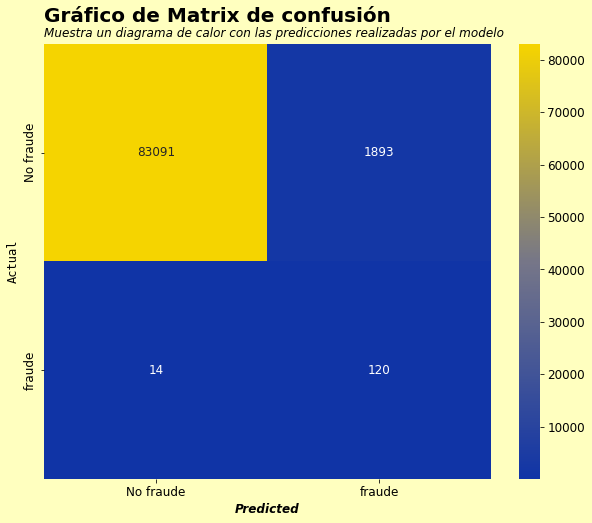

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84984
           1       0.06      0.90      0.11       134

    accuracy                           0.98     85118
   macro avg       0.53      0.94      0.55     85118
weighted avg       1.00      0.98      0.99     85118



In [55]:
conf_matrix = confusion_matrix(y_test, pred)

sns.heatmap(conf_matrix, xticklabels=["No fraude","fraude"], yticklabels=["No fraude","fraude"], annot=True, fmt="d",cmap=cmap);
plt.ylabel('Actual',size=12, family='monospace')
plt.xlabel('Predicted', size=12, fontstyle='italic', weight=600)
plt.text(-0,-0.10,"Gráfico de Matrix de confusión",fontsize=20,weight=600)
plt.text(-0,-0.03,"Muestra un diagrama de calor con las predicciones realizadas por el modelo",style="italic")
plt.show()
print(classification_report(y_test, pred))

Miramos como esta distribuida nuestro set de entrenamiento

In [56]:
from collections import Counter
Counter(y_train)

Counter({0: 198269, 1: 339})

4.2 Sobreajuste del modelo 

    4.2.1. Importar librería para sobreajustar los datos de fraude.

    4.2.2.Creación del modelo de entrenamiento.
    4.2.3.Creamos el modelo con las variables a predecir balanceadas haciendo que el modelo iguale las muestras de fraude con las muestras de no fraude.
    4.2.4. Imprimimos la diferencia de las clases a predecir.
    4.2.5. Creamos el modelo LogisticRegression.
    4.2.6. Entrenamos el modelo con las variables balanceadas.
    4.2.7. Observamos la puntuación.
    4.2.8. Creamos las predicion de la clases de test.
    4.2.9. Imprimimos el resultado de la precisión del modelo.
    4.2.10. Creamos las matriz de confusión con el objetivo de ver el tipo de prediciones.
    4.2.11. Creamos el gráfico para ver la matriz de confusión de manera más visual.
    4.2.12. Imprimimos el reporte de clasificación


Distribución antes del remuestreo Counter({0: 198269, 1: 339})
Distribución despues del remuestreo Counter({0: 198269, 1: 198269})
0.9490187573448194
Precisión de acierto del modelo: LogisticRegression 97.74783


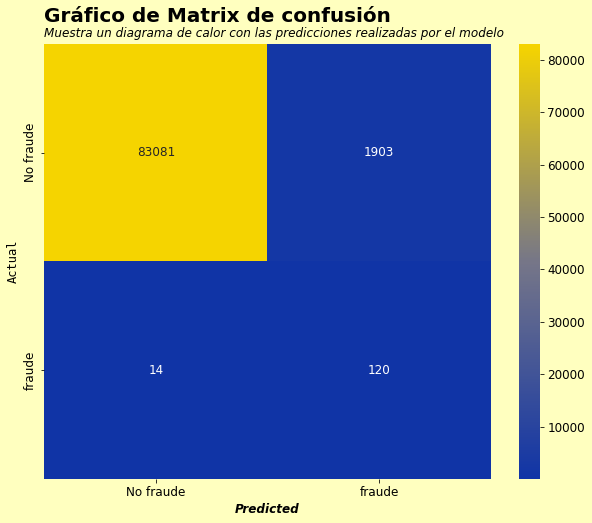

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84984
           1       0.06      0.90      0.11       134

    accuracy                           0.98     85118
   macro avg       0.53      0.94      0.55     85118
weighted avg       1.00      0.98      0.99     85118



In [57]:

from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(x_train, y_train)
 
print("Distribución antes del remuestreo {}".format(Counter(y_train)))
print("Distribución despues del remuestreo {}".format(Counter(y_train_res)))
 
clf=LogisticRegression(random_state=1,solver="newton-cg")
clf.fit(X_train_res,y_train_res)
clf.score(X_train_res,y_train_res)
print(clf.score(X_train_res,y_train_res))
pred=clf.predict(x_test)
print("Precisión de acierto del modelo: LogisticRegression", round(accuracy_score(y_test,pred)*100,5))
conf_matrix = confusion_matrix(y_test, pred)


sns.heatmap(conf_matrix, xticklabels=["No fraude","fraude"], yticklabels=["No fraude","fraude"], annot=True, fmt="d",cmap=cmap);
plt.ylabel('Actual',size=12, family='monospace')
plt.xlabel('Predicted', size=12, fontstyle='italic', weight=600)
plt.text(-0,-0.10,"Gráfico de Matrix de confusión",fontsize=20,weight=600)
plt.text(-0,-0.03,"Muestra un diagrama de calor con las predicciones realizadas por el modelo",style="italic")
plt.show()
print (classification_report(y_test, pred))

    4.2.1. Importar librería para infrajustar los datos de no fraude.

    4.2.2.Creación del modelo de entrenamiento.
    4.2.3.Creamos el modelo con las variables a predecir balanceadas haciendo que el modelo iguale las muestras de no fraude con las muestras de fraude.
    4.2.4. Imprimimos la diferencia de las clases a predecir.
    4.2.5. Creamos el modelo LogisticRegression.
    4.2.6. Entrenamos el modelo con las variables balanceadas.
    4.2.7. Observamos la puntuación.
    4.2.8. Creamos las predicion de la clases de test.
    4.2.9. Imprimimos el resultado de la precisión del modelo.
    4.2.10. Creamos las matriz de confusión con el objetivo de ver el tipo de prediciones.
    4.2.11. Creamos el gráfico para ver la matriz de confusión de manera más visual.
    4.2.12. Imprimimos el reporte de clasificación

Distribución antes del remuestreo Counter({0: 198269, 1: 339})
Distribución despues del remuestreo Counter({0: 339, 1: 339})


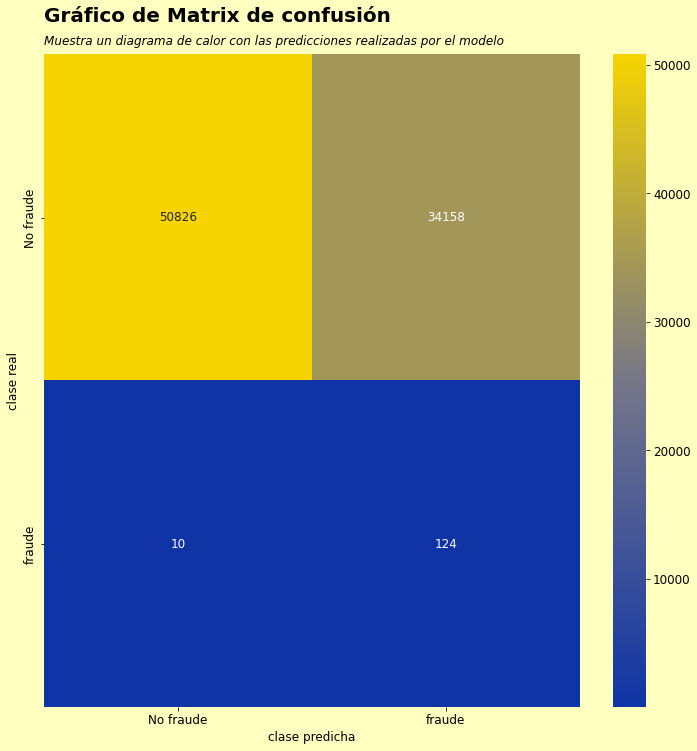

              precision    recall  f1-score   support

           0       1.00      0.60      0.75     84984
           1       0.00      0.93      0.01       134

    accuracy                           0.60     85118
   macro avg       0.50      0.76      0.38     85118
weighted avg       1.00      0.60      0.75     85118



In [58]:
from imblearn.under_sampling import NearMiss
us=NearMiss()
X_train_res, y_train_res = us.fit_resample(x_train, y_train)

print("Distribución antes del remuestreo {}".format(Counter(y_train)))
print("Distribución despues del remuestreo {}".format(Counter(y_train_res)))
 
clf=LogisticRegression(random_state=1,solver="newton-cg")
clf.fit(X_train_res,y_train_res)
clf.score(X_train_res,y_train_res)
pred=clf.predict(x_test)
accuracy_score(y_test,pred)
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=["No fraude","fraude"], yticklabels=["No fraude","fraude"], annot=True, fmt="d",cmap=cmap);
plt.ylabel('clase real')
plt.xlabel('clase predicha')
plt.text(-0,-0.10,"Gráfico de Matrix de confusión",fontsize=20,weight=600)
plt.text(-0,-0.03,"Muestra un diagrama de calor con las predicciones realizadas por el modelo",style="italic")
plt.show()
print (classification_report(y_test, pred))

In [59]:
from sklearn.neighbors import KNeighborsClassifier

def ml_model(x_train,x_test, y_train, y_test):
  MLA = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier()]
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)
  row_index = 0
  for alg in MLA:
    predicted = alg.fit(x_train, y_train).predict(x_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 2)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 2)
    MLA_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),2)
    MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),2)
    MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(y_test, predicted),2)
    row_index+=1
  MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
  return MLA_compare  
ml_model(x_train,x_test, y_train, y_test)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,1.0,1.0,0.87,0.55,0.68
1,KNeighborsClassifier,1.0,1.0,0.93,0.73,0.82
2,DecisionTreeClassifier,1.0,1.0,0.70,0.76,0.73


En este punto podemos observar que el modelo de vecinos cercanos performa mejor que las de regresión logística y árbol de decisión, por lo tanto vamos a proceder a hacer una validación cruzada de los datos de este modelo para ver si sus métricas varian, dado que originalmente el data set esta desbalanceado.

### Continuaremos con las validaciones. Vamos a utilizar Cross validation, pero aleatorio, dado que el costo computacional para ir iterando de registro a registro de forma linear en nuestro data set con muchos datos va a ser muy alto 

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
import scipy as sp

params = {'n_neighbors': sp.stats.randint(1,20),
             'weights':['uniform', 'distance'],
             'leaf_size': sp.stats.randint(1,20),
             'algorithm': ['auto', 'kd_tree']}

In [62]:
knn = KNeighborsClassifier()

In [63]:
model = RandomizedSearchCV(knn, params, n_iter=2, random_state=0, cv=5)

In [64]:
model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=2,
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fba851dc790>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fba851dca50>,
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [65]:
print('Mejores parámetros: ' + str(model.best_params_))
print('Mejor score: '+ str(model.best_score_))

Mejores parámetros: {'algorithm': 'kd_tree', 'leaf_size': 4, 'n_neighbors': 8, 'weights': 'distance'}
Mejor score: 0.9994964953558473


##Conclusiones finales:##

En primer lugar, haber elegido el modelo de árboles de decisión nos enseño que podiamos encarar el problema desde otro lado porque no habiamos testeado otros modelos y fue el momento de iterar, probar varios modelos y decidir con cual quedarnos en base a los resultados obtenidos de cada uno.

En segundo, para poder explotar más el modelo y testear otros se tuvo que "balancear" el data set, si nos hubieramos quedado con el primer modelo quizás no hubieramos obtenido mejores resultados con el de vecinos cernanos.

En tercer lugar, creemos que es posible mejorar estos resultados obtenidos con la ayuda de otras variables de segmentación y agregando contexto a los datos, y no basarnos unicamente en la unica variable categorica del modelo actual. Podría ser una variable que especifique el origen o dispositivo de la transacción, esto podría darnos otro punto de vista y quizás mejor predicción. 

Por último, si disponieramos de las consideraciones anteriores y mayor cantidad de datos para evaluar los distintos modelos, creemos firmemente que podríamos lograr mejores resultados y posteriormente realizar un buen lanzamiento a producción para ayudar a las entidades financieras.

**Muchas gracias**
